# Homework 22

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import utils as utils
from fractions import Fraction
from sklearn.metrics import pairwise_distances

from IPython.display import display, HTML

# Inline plotting
%matplotlib inline

# Make sympy print pretty math expressions
sy.init_printing()

utils.load_custom_styles()

---
## Exercise 4.5

<img src="figures/homework-22/exercise-4.5.png" width="600" />








<div class="sidenote">
Suppose $\mathcal{R}_k$ is a convex set in a real vector space and $g_k : \mathcal{R}_k \to \mathbb{R}$ is a function.

Then we can define a convex function. The function $g_k(\cdot)$ is **convex** if for all pairs of samples $\mathbf{x}_1 \in \mathcal{R}_k$ and $\mathbf{x}_2 \in \mathcal{R}_k$ and for all $\lambda \in [0, 1]$, we have:

$$
        g_k(\lambda \mathbf{x}_1 + (1-\lambda) \mathbf{x}_2) \leq  
\lambda g_k(\mathbf{x}_1) + (1-\lambda) g_k(\mathbf{x}_2)
$$
<div>

We know that $\mathbf{x}_1$ and $\mathbf{x}_2$ belong to class $k$. This means that the decision function $g_k(\cdot)$ will yield a larger value i.e., the distance to the separating hyperplane will be larger than another decision function $g_l(\cdot)$. Therefore, for the two given samples, we can write:


<img src="figures/homework-22/solution-4.5a.png" width="600" />







<img src="figures/homework-22/solution-4.5b.png" width="600" />







<div class="warning">
Where does the second $\mathbf{w}_{l0}$ come from in Equation (4.27)?
<div>

Equation (4.27) gives us the follow:

<img src="figures/homework-22/solution-4.5c.png" width="600" />


Since we know that $g_l(\mathbf{x}_1) < g_k(\mathbf{x}_1)$ and $g_l(\mathbf{x}_2) < g_k(\mathbf{x}_2)$, we can substitute the expressions from 4.25 and 4.26 and change the equality size to an inequality:

<img src="figures/homework-22/solution-4.5d.png" width="600" />


Now we can write:

<div class="warning">
Why can we do this?
<div>

\begin{align}
g_l(\mathbf{z}) 
&= 
  \mathbf{w}_k^T \left[ \lambda \mathbf{x}_1 + (1-\lambda) \mathbf{w}^T\mathbf{x}_2 \right] + w_{k0}\\
&= 
  \mathbf{w}_k^T \mathbf{z} + w_{k0} \\
&= 
  g_k(\mathbf{z})
\end{align}

---
## Exercise 4.6

<img src="figures/homework-22/exercise-4.6.png" width="600" />








Suppose we have $N$ samples $\mathbf{x}_i \in \mathbb{R}^D$ in two different classes. 

Suppose we pick any two samples so that
- $\mathbf{x}_{pos}$ belongs to the positive class
- $\mathbf{x}_{neg}$ belongs to the negative class

We can make each sample distinct by augmenting them with their corresponding label as follows:
- $\tilde{\mathbf{x}}_{pos} = [\mathbf{x}_{pos}^T, 1]^T$
- $\tilde{\mathbf{x}}_{neg} = [\mathbf{x}_{neg}^T, -1]^T$

Notice that we have mapped our samples from both classes to a higher dimension.

Given a linear decision function $g(\mathbf{x}) = \mathbf{w}^T \mathbf{x}$, all samples can be classified correctly using the following weight vector:

$$
\mathbf{w} = 
  \begin{bmatrix}
  0\\0\\ \vdots \\ 1
  \end{bmatrix}
$$

Another approach:

<img src="figures/homework-22/solution-4.6.png" width="600" />















---
## Exercise 4.7

<img src="figures/homework-22/exercise-4.7.png" width="600" />














<div class="warning">
Why can we do this? Restudy!
<div>



<img src="figures/homework-22/solution-4.7.png" width="600" />




---
## Exercise 5.1

<img src="figures/homework-22/exercise-5.1.png" width="600" />








In [2]:
c1 = np.array([[1, 2, 2],
               [1, 2, 0]])
c2 = np.array([[0, 1, 0],
               [0, 0, 1]])

In [9]:
X = np.concatenate([c1, c2], axis=1)
y_c1 = np.ones(c1.shape[1])
y_c2 = -np.ones(c2.shape[1])
y = np.concatenate([y_c1, y_c2])

In [11]:
y

array([ 1.,  1.,  1., -1., -1., -1.])

In [10]:
X

array([[1, 2, 2, 0, 1, 0],
       [1, 2, 0, 0, 0, 1]])

In [5]:
X[0,:]

array([1, 2, 2, 0, 1, 0])

In [12]:
from sklearn import svm

In [47]:
classifier = svm.SVC(kernel='linear', C=0.01, shrinking=False)
classifier.fit(X.T, y.T)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [53]:
def plot_for_svm(clf, X, Y):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    
    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    print(margin)
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin
    
    # plot the line, the points, and the nearest vectors to the plane
    fig, ax = plt.subplots(figsize=(10, 6))
    #ax.clf()
    ax.plot(xx, yy, 'k-')
    #ax.plot(xx, yy_down, 'k--')
    #ax.plot(xx, yy_up, 'k--')

    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1])
    ax.set_ylim((-1, 3))

22.360679774997898


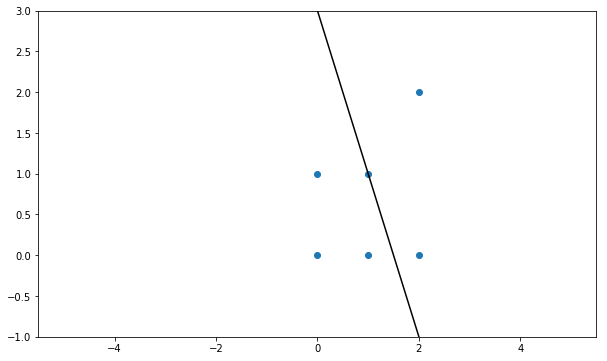

In [54]:
plot_for_svm(classifier, X.T, y.T)

In [55]:
classifier.coef_[0]

array([0.04, 0.02])

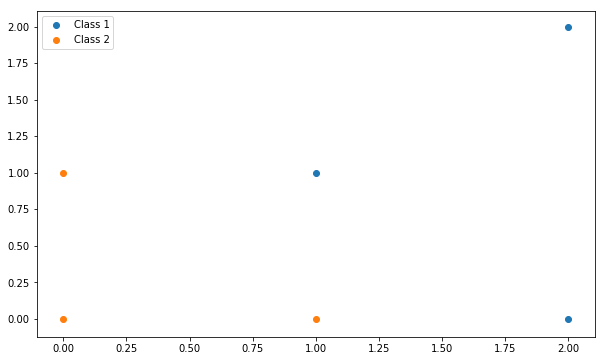

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(c1[0,:], c1[1,:], label="Class 1")
ax.scatter(c2[0,:], c2[1,:], label="Class 2")
ax.legend()

---
## Exercise 5.2

<img src="figures/homework-22/exercise-5.2.png" width="600" />








---
## Exercise 5.3: 

<center><b>Show that the linear SVM classifier always finds the optimal hyper-plane in the linear case.</b></center>







---
## Exercise 5.4

<img src="figures/homework-22/exercise-5.4.png" width="600" />




